In [63]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data_clean = pd.read_csv('data_emotion_clean.csv', encoding='latin1')
# exclude_labels = ['Happy']
# data_clean = data_clean[~data_clean['Emotion'].isin(exclude_labels)]
data_clean.head()

,Customer Review,Sentiment,Emotion
40,kecewa scroll rusak,Negative,Sadness
41,jelek yg ori mousepad jd ga bs pakai kl charge...,Negative,Sadness
42,gak pakai,Negative,Sadness
43,kecewa parah nggk berkah jual gitu,Negative,Sadness
44,kecewa jual ga tanggung komplen hari gada solusi,Negative,Sadness


In [65]:
MAX_NB_WORDS = 6000
MAX_WORDS = data_clean['Customer Review'].str.split().str.len().max()
tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(data_clean['Customer Review'].astype('U'))
word_index = tokenizer.word_index
print(word_index)

x = tokenizer.texts_to_sequences(data_clean['Customer Review'].astype('U'))
x = pad_sequences(x, maxlen = int(MAX_WORDS))
y = pd.get_dummies(data_clean['Emotion']).values

# print('Found %s uniqe tokens.' % len(word_index))
# print(x)
# print(y)

{'barang': 1, 'kirim': 2, 'yg': 3, 'nya': 4, 'beli': 5, 'ga': 6, 'kecewa': 7, 'sesuai': 8, 'gak': 9, 'banget': 10, 'bagus': 11, 'pesan': 12, 'seller': 13, 'jual': 14, 'toko': 15, 'produk': 16, 'warna': 17, 'pakai': 18, 'cepat': 19, 'rusak': 20, 'terima': 21, 'kualitas': 22, 'harga': 23, 'aja': 24, 'udah': 25, 'kasih': 26, 'respon': 27, 'ya': 28, 'tdk': 29, 'bahan': 30, 'tp': 31, 'packing': 32, 'order': 33, 'kali': 34, 'sy': 35, 'pas': 36, 'bgt': 37, 'pake': 38, 'layan': 39, 'fungsi': 40, 'jelek': 41, 'salah': 42, 'tipis': 43, 'recommended': 44, 'proses': 45, 'aman': 46, 'sih': 47, 'belanja': 48, 'komplain': 49, 'mantap': 50, 'murah': 51, 'gambar': 52, 'deskripsi': 53, 'chat': 54, 'jg': 55, 'cek': 56, 'rapi': 57, 'kalo': 58, 'buka': 59, 'beda': 60, 'plastik': 61, 'sampe': 62, 'gk': 63, 'ukur': 64, 'udh': 65, 'dgn': 66, 'coba': 67, 'krn': 68, 'foto': 69, 'bubble': 70, 'jd': 71, 'jam': 72, 'deh': 73, 'langsung': 74, 'ganti': 75, 'moga': 76, 'paket': 77, 'dr': 78, 'parah': 79, 'suka': 80, 

In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3,
     random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2541, 137) (2541, 4)
(1089, 137) (1089, 4)


In [67]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(LSTM(128))
model.add(Dense(int(y.shape[1]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 137, 100)          600000    
                                                                 
 lstm_6 (LSTM)               (None, 128)               117248    
                                                                 
 dense_6 (Dense)             (None, 4)                 516       
                                                                 
Total params: 717764 (2.74 MB)
Trainable params: 717764 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
epochs = 10
batch_size = 500
model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size)

Epoch 1/10
6/6 [==============================] - 8s 773ms/step - loss: 1.3772 - accuracy: 0.3101
Epoch 2/10
6/6 [==============================] - 5s 815ms/step - loss: 1.3532 - accuracy: 0.3310
Epoch 3/10
6/6 [==============================] - 5s 839ms/step - loss: 1.3323 - accuracy: 0.3538
Epoch 4/10
6/6 [==============================] - 5s 844ms/step - loss: 1.2899 - accuracy: 0.4360
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 1.2084 - accuracy: 0.4778
Epoch 6/10
6/6 [==============================] - 6s 902ms/step - loss: 1.2814 - accuracy: 0.5155
Epoch 7/10
6/6 [==============================] - 10s 2s/step - loss: 1.1359 - accuracy: 0.5396
Epoch 8/10
6/6 [==============================] - 9s 1s/step - loss: 1.0971 - accuracy: 0.5919
Epoch 9/10
6/6 [==============================] - 6s 1s/step - loss: 1.0510 - accuracy: 0.6403
Epoch 10/10
6/6 [==============================] - 6s 947ms/step - loss: 0.9988 - accuracy: 0.6734


35/35 [==============================] - 2s 36ms/step
Accuracy:  0.5436179981634527
Precision:  0.4768776343009079
Recall:  0.5083307173064591






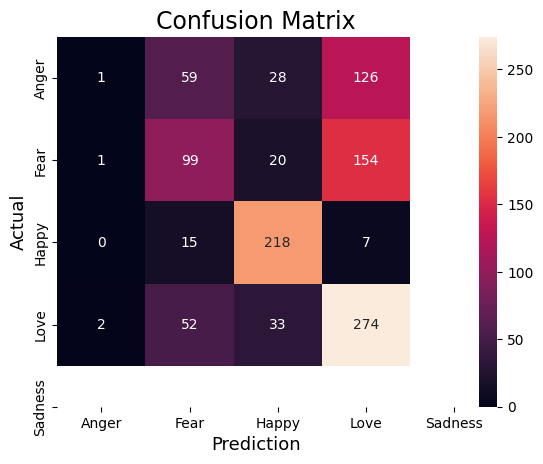



              precision    recall  f1-score   support

           0       0.25      0.00      0.01       214
           1       0.44      0.36      0.40       274
           2       0.73      0.91      0.81       240
           3       0.49      0.76      0.59       361

    accuracy                           0.54      1089
   macro avg       0.48      0.51      0.45      1089
weighted avg       0.48      0.54      0.48      1089



In [69]:
def predicted_emotion_lstm(y_test,predicted):
    print("Accuracy: ", accuracy_score(y_test, predicted))
    print("Precision: ", precision_score(y_test,predicted, average="macro"))
    print("Recall: ", recall_score(y_test,predicted, average="macro"))
    # print("F1 Score: ", f1_score(y_test, predicted, average="macro"))
    print('\n')
    # print(f"Confusion Matrix:\n {confusion_matrix(y_test, predicted)}")
    print('\n')
    cm = confusion_matrix(y_test, predicted)
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Anger', 'Fear', 'Happy', 'Love', 'Sadness'],
            yticklabels=['Anger', 'Fear', 'Happy', 'Love', 'Sadness'])
    plt.xlabel('Prediction', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
    print('\n')
    print(classification_report(y_test, predicted, zero_division = 1))

predicted_lstm = model.predict(x_test)

y_pred=np.argmax(predicted_lstm, axis=1)
y_test=np.argmax(y_test, axis=1)

predicted_emotion_lstm(y_test,y_pred)